In [2]:
import pandas as pd
import numpy as np

## Step 1: Load the Data Set

In [15]:
df=pd.read_excel('dss_publish.xlsx')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974970 entries, 0 to 974969
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice Date  974970 non-null  datetime64[ns]
 1   Item Code     974970 non-null  object        
 2   QTY           974970 non-null  int64         
 3   Total Cost    974970 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 29.8+ MB


In [19]:
df.head()

,Invoice Date,Item Code,QTY,Total Cost
0,2024-12-31,155108e1,1,29.00
1,2024-12-31,7fdf96c6,1,13.23
2,2024-12-31,4c201ddc,3,318.78
3,2024-12-31,c23dc657,1,50.40
4,2024-12-31,dc08c95c,8,14.72


In [21]:
df['month']=df['Invoice Date'].dt.to_period('M')

In [35]:
df.head()

,Invoice Date,Item Code,QTY,Total Cost,month
0,2024-12-31,155108e1,1,29.00,2024-12
1,2024-12-31,7fdf96c6,1,13.23,2024-12
2,2024-12-31,4c201ddc,3,318.78,2024-12
3,2024-12-31,c23dc657,1,50.40,2024-12
4,2024-12-31,dc08c95c,8,14.72,2024-12


## 2. ABC Analysis

In [42]:
abc_df=df.groupby('Item Code')['Total Cost'].sum().reset_index()

In [46]:
abc_df.head(2)

,Item Code,Total Cost
0,001343f3,5925.114817
1,00225dd5,3896.121140


In [48]:
abc_df=abc_df.sort_values('Total Cost',ascending=False)

In [54]:
abc_df['cum_pct']=abc_df['Total Cost'].cumsum()/abc_df['Total Cost'].sum()

In [58]:
# function for ABC classification

def classify_abc(x):
    if x<=0.7:
        return 'A'
    elif x<=0.9:
        return 'B'
    else:
        return 'C'

#applyting on the dataframe

abc_df['ABC']=abc_df['cum_pct'].apply(classify_abc)

In [60]:
abc_df

,Item Code,Total Cost,cum_pct,ABC
2149,6672fbd4,5.836784e+06,0.021287,A
964,2d331125,3.709988e+06,0.034818,A
1758,53509f65,2.477283e+06,0.043853,A
4343,d158d5ce,2.436511e+06,0.052739,A
4871,ea97304e,2.133111e+06,0.060518,A
...,...,...,...,...
2590,7c256a0a,0.000000e+00,1.000000,C
107,050e31a1,0.000000e+00,1.000000,C
4145,c8401c38,0.000000e+00,1.000000,C
1074,32949e8a,0.000000e+00,1.000000,C


In [62]:
# Visualization

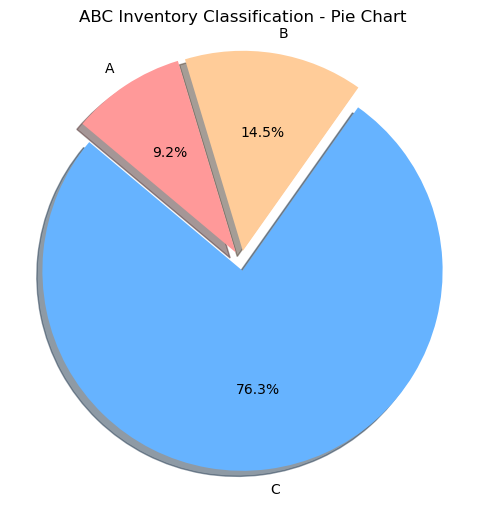

In [64]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'stats' and has a column 'XYZ'
abc_counts = abc_df['ABC'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
colors = ['#66b3ff', '#ffcc99', '#ff9999']  # X, Y, Z colors
explode = (0.05, 0.05, 0.05)  # To slightly pull out all slices

plt.pie(
    abc_counts,
    labels=abc_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title('ABC Inventory Classification - Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

## Step 3: XYZ Analisis

In [69]:
df['week']=df['Invoice Date'].dt.to_period('W')

In [75]:
#df['week'].unique()


In [77]:
weekly_sales=df.groupby(['Item Code','week'])['QTY'].sum().reset_index()

In [79]:
weekly_sales

,Item Code,week,QTY
0,001343f3,2024-01-08/2024-01-14,21
1,001343f3,2024-01-15/2024-01-21,134
2,001343f3,2024-02-12/2024-02-18,30
3,001343f3,2024-02-19/2024-02-25,90
4,001343f3,2024-03-04/2024-03-10,60
...,...,...,...
114689,fff4227c,2024-01-15/2024-01-21,1
114690,fff4227c,2024-03-18/2024-03-24,1
114691,fff4227c,2024-04-01/2024-04-07,1
114692,fff4227c,2024-04-08/2024-04-14,1


In [83]:
stats=weekly_sales.groupby('Item Code')['QTY'].agg(['mean','std']).reset_index()

In [87]:
stats

,Item Code,mean,std
0,001343f3,35.920000,31.369996
1,00225dd5,80.000000,30.413813
2,002c3dfa,3.142857,2.115701
3,00360ad5,88.711111,71.926295
4,004ae629,1.750000,0.957427
...,...,...,...
5331,ffd00e62,67.391304,98.093990
5332,ffec21ea,102.716981,48.718334
5333,fff0824e,5.380952,4.631157
5334,fff09a09,14.000000,4.898979


In [89]:
stats['cv']=stats['std']/stats['mean']

In [105]:
stats

,Item Code,mean,std,cv
0,001343f3,35.920000,31.369996,0.873330
1,00225dd5,80.000000,30.413813,0.380173
2,002c3dfa,3.142857,2.115701,0.673178
3,00360ad5,88.711111,71.926295,0.810792
4,004ae629,1.750000,0.957427,0.547101
...,...,...,...,...
5331,ffd00e62,67.391304,98.093990,1.455588
5332,ffec21ea,102.716981,48.718334,0.474297
5333,fff0824e,5.380952,4.631157,0.860658
5334,fff09a09,14.000000,4.898979,0.349927


In [96]:
# function for XYZ classification

In [124]:
def classify_xyz(cv):
    if cv<=0.5:
        return 'X'
    elif cv<=1:
        return 'Y'
    else:
        return 'Z'

## applying the function on the data frame

stats['XYZ']=stats['cv'].apply(classify_xyz)

In [126]:
stats

,Item Code,mean,std,cv,XYZ
0,001343f3,35.920000,31.369996,0.873330,Y
1,00225dd5,80.000000,30.413813,0.380173,X
2,002c3dfa,3.142857,2.115701,0.673178,Y
3,00360ad5,88.711111,71.926295,0.810792,Y
4,004ae629,1.750000,0.957427,0.547101,Y
...,...,...,...,...,...
5331,ffd00e62,67.391304,98.093990,1.455588,Z
5332,ffec21ea,102.716981,48.718334,0.474297,X
5333,fff0824e,5.380952,4.631157,0.860658,Y
5334,fff09a09,14.000000,4.898979,0.349927,X


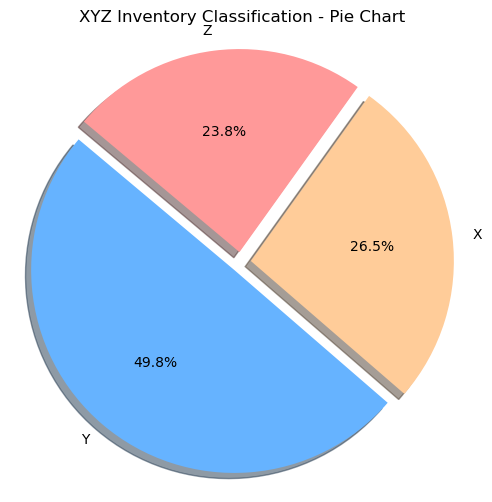

In [128]:
## Visualization

# Assuming your DataFrame is named 'stats' and has a column 'XYZ'
xyz_counts = stats['XYZ'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
colors = ['#66b3ff', '#ffcc99', '#ff9999']  # X, Y, Z colors
explode = (0.05, 0.05, 0.05)  # To slightly pull out all slices

plt.pie(
    xyz_counts,
    labels=xyz_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title('XYZ Inventory Classification - Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()


## Step 4: Finding consumption deviation for predicting stockouts or over stocking using Z-score

In [134]:
monthly_sale=df.groupby(['Item Code','month'])['QTY'].sum().reset_index()

In [150]:
monthly_df=monthly_sale

In [152]:
def compute_z_score(group):
    group = group.sort_values('month')
    recent_month = group['month'].max()
    historical = group[group['month'] < recent_month]
    recent = group[group['month'] == recent_month]

    if historical.shape[0] < 4:
        return pd.DataFrame({
            'Item Code': [group['Item Code'].iloc[0]],
            #'Item Name': [group['Item Name'].iloc[0]],
            'z_score': [np.nan],
            'status': ['Insufficient history']
        })
    
    mean = historical['QTY'].mean()
    std = historical['QTY'].std()
    recent_qty = recent['QTY'].values[0]
    
    if std == 0:
        z = 0
    else:
        z = (recent_qty - mean) / std

    # Determine status
    if z > 2:
        status = "Unexpected spike"
    elif z > 1.5:
        status = "Monitor the consumption"
    #elif z<0 and z>-2:
      #  status= "Reduction in consumption"
    elif z< -2:
        status= "Unexpected Consumption Reduced" 
    else:
        status = "Within expected range"

    return pd.DataFrame({
        'Item Code': [group['Item Code'].iloc[0]],
        #'Item Name': [group['Item Name'].iloc[0]],
        'z_score': [round(z, 2)],
        'status': [status]
    })

In [156]:
deviation_df = (monthly_df.groupby(['Item Code']).apply(compute_z_score).reset_index(drop=True))

/var/folders/v6/b6p52t217dl0zncsqc790k4m0000gn/T/ipykernel_22739/2453598585.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  deviation_df = (monthly_df.groupby(['Item Code']).apply(compute_z_score).reset_index(drop=True))


In [159]:
deviation_df

,Item Code,z_score,status
0,001343f3,0.25,Within expected range
1,00225dd5,NaN,Insufficient history
2,002c3dfa,NaN,Insufficient history
3,00360ad5,-1.52,Within expected range
4,004ae629,NaN,Insufficient history
...,...,...,...
5331,ffd00e62,-1.02,Within expected range
5332,ffec21ea,-0.82,Within expected range
5333,fff0824e,-0.59,Within expected range
5334,fff09a09,NaN,Insufficient history


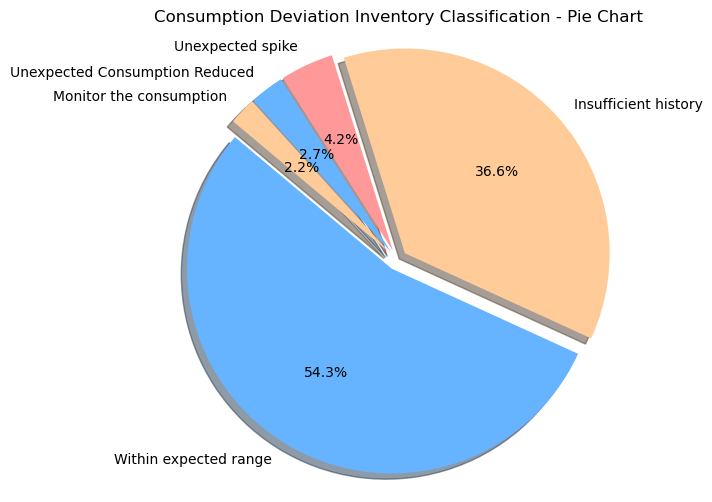

In [161]:
## Visulization

# Assuming your DataFrame is named 'stats' and has a column 'XYZ'
dev_counts = deviation_df['status'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))

explode = (0.05, 0.05, 0.05,0.05,0.05)  # To slightly pull out all slices

plt.pie(
    dev_counts,
    labels=dev_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title('Consumption Deviation Inventory Classification - Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

## Step-5: Calculating Days Of Inventory for Current stock levels

In [168]:
current_stock_df=pd.read_excel('publish_current_stock_backup.xlsx')

In [172]:
current_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item Code  3828 non-null   object
 1   QTY        3828 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.9+ KB


In [176]:
monthly_sale.head()

,Item Code,month,QTY
0,001343f3,2024-01,155
1,001343f3,2024-02,120
2,001343f3,2024-03,211
3,001343f3,2024-04,10
4,001343f3,2024-05,20


In [186]:
# Step 1: Compute daily consumption per item
daily_consumption=monthly_sale.groupby('Item Code')['QTY'].mean()/30

# Step 2: Merge with current stock data
doh_df = current_stock_df.merge(daily_consumption.reset_index(name='Daily Consumption'),on='Item Code',how='left')

In [192]:
doh_df['DOH']=doh_df['QTY']/doh_df['Daily Consumption']

In [194]:
doh_df.head()

,Item Code,QTY,Daily Consumption,DOH
0,891e62ac,6,0.033333,180.000000
1,cba5655b,27,0.408333,66.122449
2,bdc4cf7b,57,0.670370,85.027624
3,72d6c8c0,24,0.181481,132.244898
4,13955f93,5,0.038889,128.571429


In [208]:
doh_df.describe()

,QTY,Daily Consumption,DOH
count,3828.000000,3828.000000,3828.000000
mean,495.276646,10.071419,inf
std,1466.982710,32.163000,NaN
min,0.000000,0.000000,0.000000
25%,12.750000,0.233333,30.000000
50%,74.500000,1.376389,57.857143
75%,352.250000,6.386111,101.739130
max,27701.000000,602.663889,inf


In [216]:
dff=pd.DataFrame()

In [220]:
# Step 1: Replace infinite values with NaN
dff['DOH_clean'] = doh_df['DOH'].replace([np.inf, -np.inf], np.nan)

In [222]:
dff

,DOH_clean
0,180.000000
1,66.122449
2,85.027624
3,132.244898
4,128.571429
...,...
3823,30.000000
3824,47.142857
3825,64.166667
3826,225.000000


In [224]:
# Step 2: Drop rows with NaN (including ones that were infinite)
dff = dff.dropna(subset=['DOH_clean'])

In [228]:
dff.describe()

,DOH_clean
count,3810.000000
mean,112.349143
std,304.639445
min,0.000000
25%,29.908907
50%,57.363759
75%,100.322547
max,6900.000000


In [246]:

# Step 3: Remove outliers using IQR method
Q1 = dff['DOH_clean'].quantile(0.25)
Q3 = dff['DOH_clean'].quantile(0.75)
IQR = Q3 - Q1

In [248]:

# Define acceptable range (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [254]:
dff['DOH_clean'] = dff['DOH_clean'].where(
    (dff['DOH_clean'] >= lower_bound) & (dff['DOH_clean'] <= upper_bound)
)


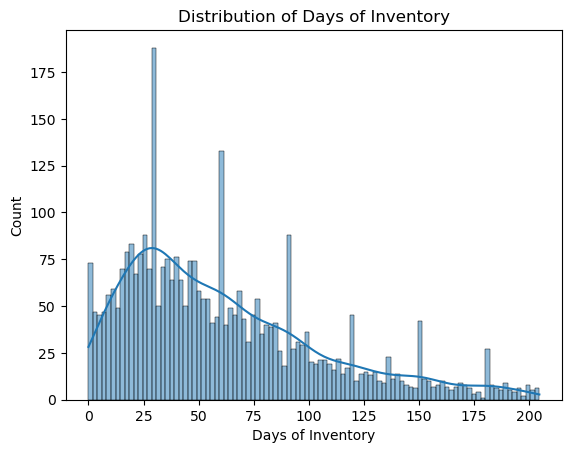

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram using seaborn
sns.histplot(data=dff, x='DOH_clean', bins=100, kde=True)
plt.title('Distribution of Days of Inventory')
plt.xlabel('Days of Inventory')
plt.ylabel('Count')
plt.show()


## Step 6 Mearge all the data Bases


In [261]:
abc_df.columns

Index(['Item Code', 'Total Cost', 'cum_pct', 'ABC'], dtype='object')

In [265]:
stats.columns

Index(['Item Code', 'mean', 'std', 'cv', 'XYZ'], dtype='object')

In [267]:
final_df=abc_df.merge(stats[['Item Code','cv','XYZ']],on='Item Code')

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X
1,2d331125,3.709988e+06,0.034818,A,0.367659,X
2,53509f65,2.477283e+06,0.043853,A,0.321395,X
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X
...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z


In [271]:
deviation_df.columns

Index(['Item Code', 'z_score', 'status'], dtype='object')

In [275]:
final_df=final_df.merge(deviation_df[['Item Code','z_score','status']],on='Item Code')

In [277]:
final_df

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range
2,53509f65,2.477283e+06,0.043853,A,0.321395,X,-1.01,Within expected range
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y,0.59,Within expected range
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X,1.17,Within expected range
...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history


In [291]:
doh_df.columns

Index(['Item Code', 'QTY', 'Daily Consumption', 'DOH'], dtype='object')

In [283]:
final_df=final_df.merge(doh_df[['Item Code', 'QTY','Daily Consumption','DOH']],on='Item Code',how='left')

In [285]:
final_df

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status,QTY,Daily Consumption,DOH
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range,37.0,9.797222,3.776581
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range,171.0,3.177778,53.811189
2,53509f65,2.477283e+06,0.043853,A,0.321395,X,-1.01,Within expected range,17265.0,602.663889,28.647809
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y,0.59,Within expected range,253.0,8.241667,30.697674
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X,1.17,Within expected range,116.0,5.944444,19.514019
...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,5.0,0.000000,inf
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,1.0,0.000000,inf
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,7.0,0.000000,inf
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,NaN,NaN,NaN


In [293]:
final_df.describe()

,Total Cost,cum_pct,cv,z_score,QTY,Daily Consumption,DOH
count,5.336000e+03,5336.000000,4712.000000,3381.000000,3828.000000,3828.000000,3828.000000
mean,5.138534e+04,0.913505,inf,-0.145173,495.276646,10.071419,inf
std,1.729859e+05,0.156723,NaN,1.517112,1466.982710,32.163000,NaN
min,-9.856000e+01,0.021287,0.000000,-6.000000,0.000000,0.000000,0.000000
25%,1.019593e+03,0.909023,0.471405,-0.960000,12.750000,0.233333,30.000000
50%,5.948206e+03,0.984088,0.648393,-0.400000,74.500000,1.376389,57.857143
75%,3.402332e+04,0.998109,0.857143,0.430000,352.250000,6.386111,101.739130
max,5.836784e+06,1.000000,inf,16.430000,27701.000000,602.663889,inf


In [305]:


# Get all rows where 'DOH' is +inf or -inf
infinite_rows = final_df[np.isinf(final_df['DOH'])]



In [317]:
final_df_copy=final_df

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status,QTY,Daily Consumption,DOH
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range,37.0,9.797222,3.776581
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range,171.0,3.177778,53.811189
2,53509f65,2.477283e+06,0.043853,A,0.321395,X,-1.01,Within expected range,17265.0,602.663889,28.647809
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y,0.59,Within expected range,253.0,8.241667,30.697674
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X,1.17,Within expected range,116.0,5.944444,19.514019
...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,5.0,0.000000,inf
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,1.0,0.000000,inf
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,7.0,0.000000,inf
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,NaN,NaN,NaN


In [325]:
## Step-7: Adding Reorder Check

reorderpoint=10

def reorder_check(x):
    if x<=reorderpoint:
        return 1
    else:
        return 0

final_df['<reorder_point']=final_df['DOH'].apply(reorder_check)

In [327]:
final_df

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status,QTY,Daily Consumption,DOH,<reorder_point
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range,37.0,9.797222,3.776581,1
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range,171.0,3.177778,53.811189,0
2,53509f65,2.477283e+06,0.043853,A,0.321395,X,-1.01,Within expected range,17265.0,602.663889,28.647809,0
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y,0.59,Within expected range,253.0,8.241667,30.697674,0
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X,1.17,Within expected range,116.0,5.944444,19.514019,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,5.0,0.000000,inf,0
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,1.0,0.000000,inf,0
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,7.0,0.000000,inf,0
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,NaN,NaN,NaN,0


In [329]:
final_df['<reorder_point'].value_counts()

<reorder_point
0    5071
1     265
Name: count, dtype: int64

In [343]:
item_count_df = df.groupby('Item Code')['Item Code'].count().reset_index(name='Item Count')


In [357]:
item_count_df.head(2)

,Item Code,Item Count
0,001343f3,35
1,00225dd5,32


## Jugging an item is regular or irregular




### As we have sale data from the last onr year, we will consider an item to be regular if sold more than 52 times in a year (considering 52 weeks are in a year). Moderate moving if sold more than 24 times in a year, slowing moving if sold less than 24 times in a year

In [364]:
def regular_moderate_slow(x):
    if x>=52:
        return 'Regular Moving'
    elif x>=24:
        return 'Moderate Moving'
    else:
        return 'Slow Moving'

item_count_df['Moving Status']=item_count_df['Item Count'].apply(regular_moderate_slow) 

In [366]:
item_count_df

,Item Code,Item Count,Moving Status
0,001343f3,35,Moderate Moving
1,00225dd5,32,Moderate Moving
2,002c3dfa,21,Slow Moving
3,00360ad5,121,Regular Moving
4,004ae629,6,Slow Moving
...,...,...,...
5331,ffd00e62,37,Moderate Moving
5332,ffec21ea,615,Regular Moving
5333,fff0824e,75,Regular Moving
5334,fff09a09,5,Slow Moving


In [370]:
final_df=final_df.merge(item_count_df[['Item Code','Item Count','Moving Status']],on='Item Code')

In [372]:
final_df

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status,QTY,Daily Consumption,DOH,<reorder_point,Item Count,Moving Status
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range,37.0,9.797222,3.776581,1,3455,Regular Moving
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range,171.0,3.177778,53.811189,0,1171,Regular Moving
2,53509f65,2.477283e+06,0.043853,A,0.321395,X,-1.01,Within expected range,17265.0,602.663889,28.647809,0,3957,Regular Moving
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y,0.59,Within expected range,253.0,8.241667,30.697674,0,865,Regular Moving
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X,1.17,Within expected range,116.0,5.944444,19.514019,0,1953,Regular Moving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,5.0,0.000000,inf,0,2,Slow Moving
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,1.0,0.000000,inf,0,2,Slow Moving
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,7.0,0.000000,inf,0,2,Slow Moving
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,NaN,NaN,NaN,0,2,Slow Moving


In [376]:
final_df.to_excel('first_out_put.xlsx')

## Step 7: Building logic for Diluting the inventory

In [379]:
final_df.columns

Index(['Item Code', 'Total Cost', 'cum_pct', 'ABC', 'cv', 'XYZ', 'z_score',
       'status', 'QTY', 'Daily Consumption', 'DOH', '<reorder_point',
       'Item Count', 'Moving Status'],
      dtype='object')

In [391]:
# Define your function
def stock_action(row):
    if (
        row['DOH'] > 60 and
        row['Moving Status'] == 'Slow Moving' and
        row['ABC'] == 'A' and
        row['z_score'] < -0.0
    ):
        return 'High Priority: Move the stock or send back to Vendor'
    
    elif (
        row['DOH'] > 60 and
        row['Moving Status'] == 'Slow Moving' and
        row['ABC'] in ['B', 'C'] and
        row['z_score'] < -0.0
    ):
        return 'Low Priority: Move the stock or send back to Vendor'
    
    else:
        return "Don't Act"

# Apply the function row-wise to the DataFrame
final_df['Action Recommendation for diluting stocks'] = final_df.apply(stock_action, axis=1)


In [403]:
final_df.head(2)

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status,QTY,Daily Consumption,DOH,<reorder_point,Item Count,Moving Status,Action Recommendation for diluting stocks
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range,37.0,9.797222,3.776581,1,3455,Regular Moving,Don't Act
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range,171.0,3.177778,53.811189,0,1171,Regular Moving,Don't Act


In [395]:
final_df['Action Recommendation for diluting stocks'].value_counts()

Action Recommendation for diluting stocks
Don't Act                                               5099
Low Priority: Move the stock or send back to Vendor      236
High Priority: Move the stock or send back to Vendor       1
Name: count, dtype: int64

In [397]:
final_df['ABC'].value_counts()

ABC
C    4072
B     772
A     492
Name: count, dtype: int64

## Step 8: Building logic for Predicting stockouts

In [405]:
final_df.columns

Index(['Item Code', 'Total Cost', 'cum_pct', 'ABC', 'cv', 'XYZ', 'z_score',
       'status', 'QTY', 'Daily Consumption', 'DOH', '<reorder_point',
       'Item Count', 'Moving Status',
       'Action Recommendation for diluting stocks'],
      dtype='object')

In [407]:
# Define your function
def stock_prediction(row):
    if (
        row['z_score'] > 2 and
        row['XYZ'] == 'X'
    ):
        return 'Spike in consumption regular demand stocks'
    
    elif (
        row['z_score'] > 2 and
        row['XYZ'] == 'Z'
    ):
        return 'Spike in consumption irregular demand stocks'
    elif (
        row['z_score'] > 2 and
        row['XYZ'] == 'Y'
    ):
        return 'Spike in consumption for moderate demand stocks'
    
    else:
        return "Don't Act"

# Apply the function row-wise to the DataFrame
final_df['Action Recommendation predicting stockouts'] = final_df.apply(stock_prediction, axis=1)

In [411]:
final_df

,Item Code,Total Cost,cum_pct,ABC,cv,XYZ,z_score,status,QTY,Daily Consumption,DOH,<reorder_point,Item Count,Moving Status,Action Recommendation for diluting stocks,Action Recommendation predicting stockouts
0,6672fbd4,5.836784e+06,0.021287,A,0.498453,X,-0.18,Within expected range,37.0,9.797222,3.776581,1,3455,Regular Moving,Don't Act,Don't Act
1,2d331125,3.709988e+06,0.034818,A,0.367659,X,0.23,Within expected range,171.0,3.177778,53.811189,0,1171,Regular Moving,Don't Act,Don't Act
2,53509f65,2.477283e+06,0.043853,A,0.321395,X,-1.01,Within expected range,17265.0,602.663889,28.647809,0,3957,Regular Moving,Don't Act,Don't Act
3,d158d5ce,2.436511e+06,0.052739,A,0.513994,Y,0.59,Within expected range,253.0,8.241667,30.697674,0,865,Regular Moving,Don't Act,Don't Act
4,ea97304e,2.133111e+06,0.060518,A,0.327528,X,1.17,Within expected range,116.0,5.944444,19.514019,0,1953,Regular Moving,Don't Act,Don't Act
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,5.0,0.000000,inf,0,2,Slow Moving,Don't Act,Don't Act
5332,050e31a1,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,1.0,0.000000,inf,0,2,Slow Moving,Don't Act,Don't Act
5333,c8401c38,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,7.0,0.000000,inf,0,2,Slow Moving,Don't Act,Don't Act
5334,32949e8a,0.000000e+00,1.000000,C,NaN,Z,NaN,Insufficient history,NaN,NaN,NaN,0,2,Slow Moving,Don't Act,Don't Act


In [413]:
final_df['Action Recommendation predicting stockouts'].value_counts()

Action Recommendation predicting stockouts
Don't Act                                          5112
Spike in consumption for moderate demand stocks     158
Spike in consumption irregular demand stocks         37
Spike in consumption regular demand stocks           29
Name: count, dtype: int64

In [415]:
final_df.to_excel('second_out_put.xlsx')